In [1]:
%matplotlib inline
import matplotlib.pyplot as plt # 시각화를 위한 맷플롯립
from sklearn.datasets import load_digits
digits = load_digits() # 1,979개의 이미지 데이터 로드

load_digits()를 통해 이미지 데이터를 로드할 수 있습니다. 로드한 전체 데이터를 digits에 저장합니다.<br>
첫 번째 샘플을 출력해보겠습다.

In [2]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


0을 흰색, 0 이상의 숫자가 검은색을 의미한다고 하면 숫자 '0'의 실루엣이 그려집니다.
실제 확인한 결과는 다음과 같습니다.

In [3]:
print(digits.target[0])

0


In [5]:
print('전체 샘플의 수 : {}'.format(len(digits.images)))

전체 샘플의 수 : 1797


이번에는 상위 5개의 샘플들을 시각화 해보겠습니다.

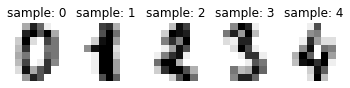

In [6]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]): # 5개의 샘플만을 출력
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

상위 5개의 샘플을 시각화한 결과 0, 1, 2, 3, 4의 손글씨 형태임을 확인할 수 있습니다. <br>
그렇다면, 실제 답을 확인해보겠습니다.

In [7]:
for i in range(5):
    print(i, '번 인덱스 샘플의 label: ', digits.target[i])

0 번 인덱스 샘플의 label:  0
1 번 인덱스 샘플의 label:  1
2 번 인덱스 샘플의 label:  2
3 번 인덱스 샘플의 label:  3
4 번 인덱스 샘플의 label:  4


이제 훈련 데이터와 레이블을 X, Y에 저장하겠습니다. digits.images는 모든 샘플을 8 x 8 size로 저장하고 있습니다.<br>
더 나은 방법은 digits.data를 사용하는 것인데, 이는 8 x 8 행렬을 전부 64차원 벡터로 저장한 상태입니다.<br>
digits.data를 이용해 첫 번쨰 샘플을 출력해보겠습니다.

In [8]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [9]:
X = digits.data # 이미지 즉, 특성 행렬
Y = digits.target # 각 이미지에 대한 label

In [11]:
import torch
import torch.nn as nn
from torch import optim

model = nn.Sequential(
    nn.Linear(64, 32), # input layer = 64, hidden layer 1 = 32
    nn.ReLU(),
    nn.Linear(32, 16), # hidden layer 2 = 32, hidden layer 3 = 16
    nn.ReLU(),
    nn.Linear(16, 10) # hidden layer 3 = 16, output layer = 10
)

X = torch.tensor(X, dtype = torch.float32)
Y = torch.tensor(Y, dtype = torch.int64)

loss_fn = nn.CrossEntropyLoss() # 이 비용 함수는 소프트맥스 함수를 포함하고 있다.
optimizer = optim.Adam(model.parameters())

losses = []

for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(X) # forward 연산
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, loss.item()
        ))
        
    losses.append(loss.item())

<ipython-input-11-680dfa9ee119>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype = torch.float32)
<ipython-input-11-680dfa9ee119>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(Y, dtype = torch.int64)


Epoch    0/100 Cost: 2.418833
Epoch   10/100 Cost: 1.913096
Epoch   20/100 Cost: 1.549183
Epoch   30/100 Cost: 1.194248
Epoch   40/100 Cost: 0.876469
Epoch   50/100 Cost: 0.635552
Epoch   60/100 Cost: 0.471077
Epoch   70/100 Cost: 0.361177
Epoch   80/100 Cost: 0.286770
Epoch   90/100 Cost: 0.235094


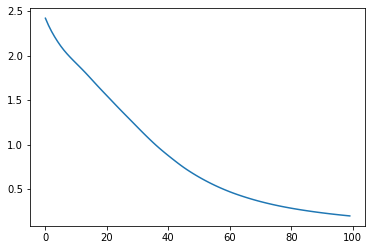

In [12]:
plt.plot(losses)